# Noise Figure

In [3]:
%matplotlib inline

In [4]:
from __future__ import division

In [5]:
import numpy as np
import scipy as sp
import scipy.integrate as spint
import matplotlib.pyplot as plt
import memristive_reservoir as memres
import numpy.random as nprand
from sklearn.linear_model import Ridge

In [6]:
noise_npz = np.load('../Filtered_noise_fixed_autocorr_2000_1.npz')
#noise_npz = np.load('../Filtered_noise_one_sided_2000_1.npz')

noise_times = noise_npz['arr_0']
filtered_noise = noise_npz['arr_1']

def noise_func(t):
    return np.interp(t, noise_times, filtered_noise, left=0., right=0.)


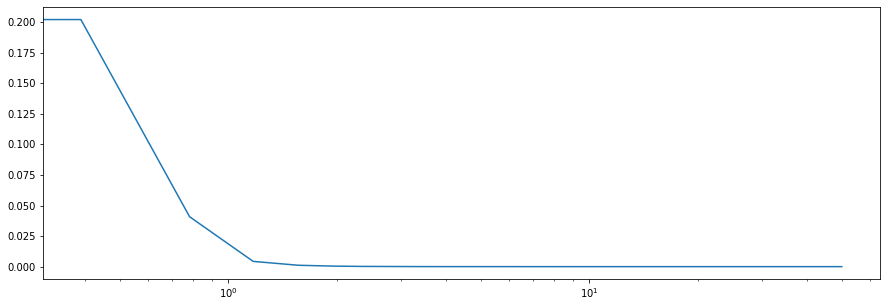

In [7]:
from scipy import signal

freq, psd = signal.welch(filtered_noise, fs=1/(noise_times[1] -noise_times[0]))

fig, ax = plt.subplots(figsize=(15,5))
ax.semilogx(freq, psd)

In [ ]:
N_times = len(noise_times)

tstep_ds = noise_times[1] - noise_times[0]

overlap = int(N_times/5)

auto_corr = np.array([np.dot(filtered_noise[:i], filtered_noise[-i:])/N_times for i in range(overlap, N_times)])
auto_corr = np.flipud(auto_corr)
auto_corr_times = tstep_ds* np.arange(N_times-overlap)

source_noise = None
noise_max = np.max(np.abs(filtered_noise))

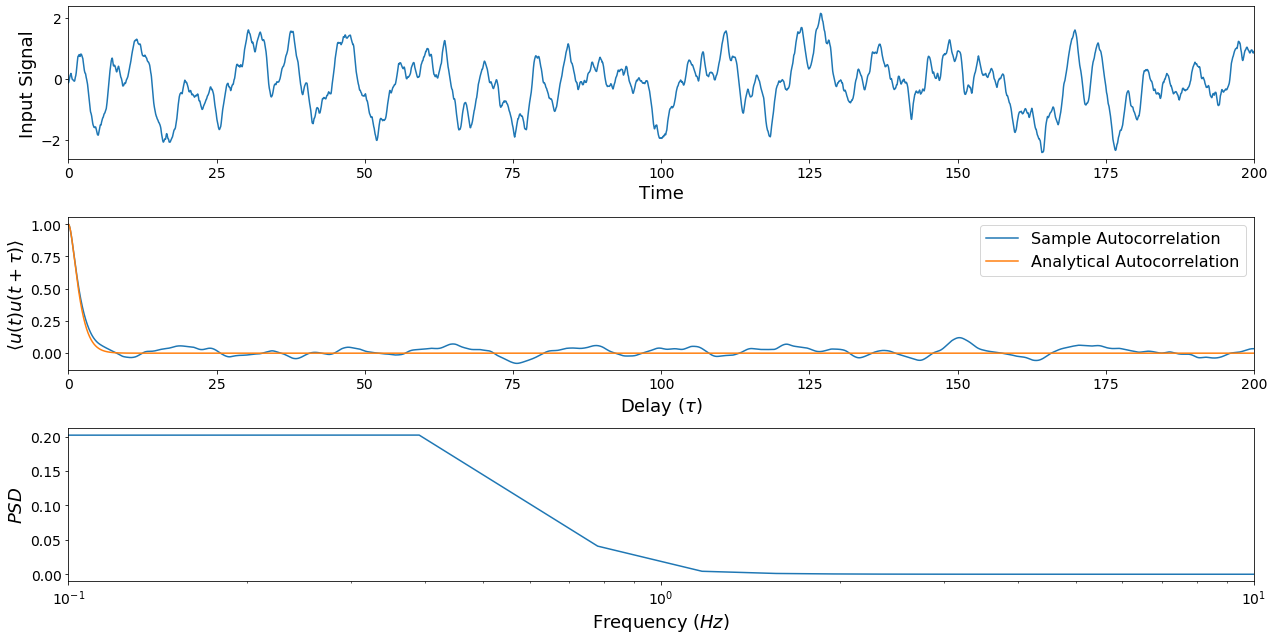

In [49]:
fig, ax = plt.subplots(3, 1, figsize=(17.8, 9))
ax[0].plot(noise_times[:20000], filtered_noise[:20000])
ax[1].plot(auto_corr_times[:20000], auto_corr[:20000], label='Sample Autocorrelation')
ax[1].plot(auto_corr_times[:20000], (auto_corr_times[:20000] + 1)*np.exp(-1*auto_corr_times[:20000]), label='Analytical Autocorrelation')
ax[2].semilogx(freq[:38], psd[:38])


ax[0].set_xlim(0, 200)
ax[1].set_xlim(0, 200)
ax[2].set_xlim(0.1, 10)

ax[1].legend(fontsize=16)

ax[0].set_xlabel('Time', fontsize=18)
ax[0].set_ylabel('Input Signal', fontsize=18)

ax[1].set_xlabel(r'Delay $(\tau)$', fontsize=18)
ax[1].set_ylabel(r'$\langle u(t)u(t+\tau)\rangle$', fontsize=18)

ax[2].set_xlabel(r'Frequency $(Hz)$', fontsize=18)
ax[2].set_ylabel(r'$PSD$', fontsize=18)


ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
ax[2].tick_params(labelsize=14)
fig.tight_layout()


array([ 0.      ,  0.390625,  0.78125 ,  1.171875,  1.5625  ,  1.953125,
        2.34375 ,  2.734375,  3.125   ,  3.515625,  3.90625 ,  4.296875,
        4.6875  ,  5.078125,  5.46875 ,  5.859375,  6.25    ,  6.640625,
        7.03125 ,  7.421875,  7.8125  ,  8.203125,  8.59375 ,  8.984375,
        9.375   ,  9.765625, 10.15625 , 10.546875, 10.9375  , 11.328125,
       11.71875 , 12.109375, 12.5     , 12.890625, 13.28125 , 13.671875,
       14.0625  , 14.453125, 14.84375 , 15.234375, 15.625   , 16.015625,
       16.40625 , 16.796875, 17.1875  , 17.578125, 17.96875 , 18.359375,
       18.75    , 19.140625, 19.53125 , 19.921875, 20.3125  , 20.703125,
       21.09375 , 21.484375, 21.875   , 22.265625, 22.65625 , 23.046875,
       23.4375  , 23.828125, 24.21875 , 24.609375, 25.      , 25.390625,
       25.78125 , 26.171875, 26.5625  , 26.953125, 27.34375 , 27.734375,
       28.125   , 28.515625, 28.90625 , 29.296875, 29.6875  , 30.078125,
       30.46875 , 30.859375, 31.25    , 31.640625, 

array([3.32162445e-02, 2.02141351e-01, 4.08479700e-02, 4.30524186e-03,
       1.13168206e-03, 4.31701601e-04, 1.89005244e-04, 1.02070282e-04,
       5.95161725e-05, 3.66550287e-05, 2.33614546e-05, 1.66299919e-05,
       1.21885861e-05, 8.35006016e-06, 5.97641023e-06, 4.57285631e-06,
       3.41592064e-06, 2.68544573e-06, 2.16726798e-06, 1.73273716e-06,
       1.39998018e-06, 1.19278062e-06, 9.52167413e-07, 7.73348903e-07,
       6.72543084e-07, 5.80218574e-07, 4.97161471e-07, 4.20780847e-07,
       3.66756866e-07, 3.29916819e-07, 2.90872404e-07, 2.61074535e-07,
       2.22315347e-07, 1.85531320e-07, 1.67377120e-07, 1.46058510e-07,
       1.33165960e-07, 1.20120960e-07, 1.08566984e-07, 9.49023141e-08,
       8.63859870e-08, 7.86036659e-08, 7.34755153e-08, 6.65528095e-08,
       6.05024280e-08, 5.63650084e-08, 5.30260221e-08, 4.62102041e-08,
       4.12882785e-08, 3.82282269e-08, 3.54503297e-08, 3.20022967e-08,
       2.98360539e-08, 2.83989216e-08, 2.71770453e-08, 2.51685774e-08,
      